# California Housing Challenge

The notebook is intened to predict the average house value upon the provided features

In [32]:
# Import Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [33]:
# Read treaning data
california_housing_train = pd.read_csv('./../data/california_housing_train.csv')

In [6]:
california_housing_train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [8]:
california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


## Eploratory data analysis

### Median income distribution

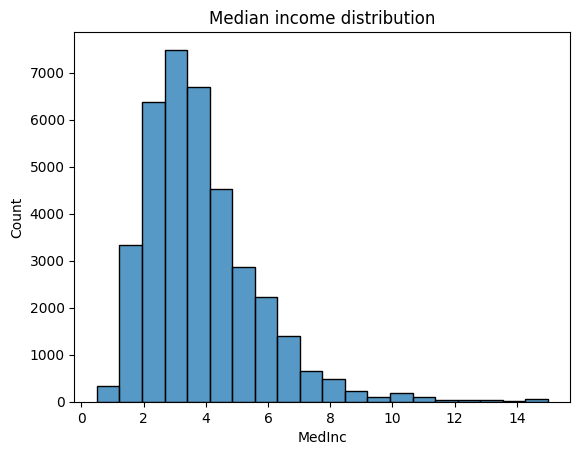

In [15]:
# median income (MedInc) distribution
ax = sns.histplot(california_housing_train, x = 'MedInc', bins = 20)

ax.set_title('Median income distribution')

plt.show()

## House value per median income

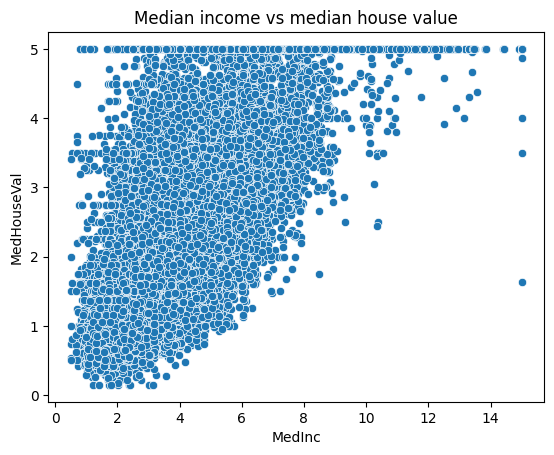

In [26]:
# scatter plot with median income and median house value (MedHouseVal)
ax = sns.scatterplot(california_housing_train,
            x = 'MedInc',
            y = 'MedHouseVal')

ax.set_title('Median income vs median house value')

plt.show()

By the plot the data looks capped, I'll verify this hypotesis looking at the max value of median house value

In [23]:
# are there >5 mil value houses?
california_housing_train['MedHouseVal'].max()

5.00001

### Median house value distribution

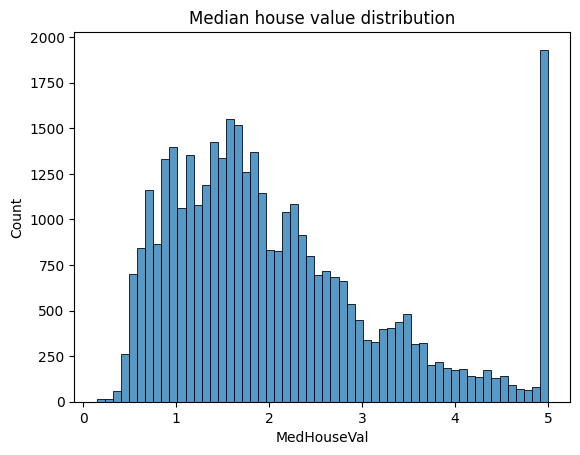

In [31]:
# hist plot pf MedHouseVal
ax = sns.histplot(california_housing_train, x='MedHouseVal')

ax.set_title('Median house value distribution')

plt.show()

In [59]:
correlation_train = pd.DataFrame.corr(california_housing_train, method='pearson')

print(correlation_train)

                   id    MedInc  HouseAge  AveRooms  AveBedrms  Population  \
id           1.000000  0.000312 -0.001248 -0.000506  -0.004370    0.002427   
MedInc       0.000312  1.000000 -0.080542  0.699994  -0.127169   -0.008552   
HouseAge    -0.001248 -0.080542  1.000000 -0.156625  -0.056960   -0.235459   
AveRooms    -0.000506  0.699994 -0.156625  1.000000   0.174753   -0.038099   
AveBedrms   -0.004370 -0.127169 -0.056960  0.174753   1.000000   -0.007120   
Population   0.002427 -0.008552 -0.235459 -0.038099  -0.007120    1.000000   
AveOccup    -0.000980 -0.000885 -0.002792  0.023858  -0.009257    0.022825   
Latitude    -0.000911 -0.060463  0.021071  0.095169   0.026142   -0.069944   
Longitude    0.001887 -0.043742 -0.090394 -0.088184   0.015218    0.071085   
MedHouseVal -0.001358  0.701925  0.103210  0.366727  -0.067487   -0.038479   

             AveOccup  Latitude  Longitude  MedHouseVal  
id          -0.000980 -0.000911   0.001887    -0.001358  
MedInc      -0.000885 -0.

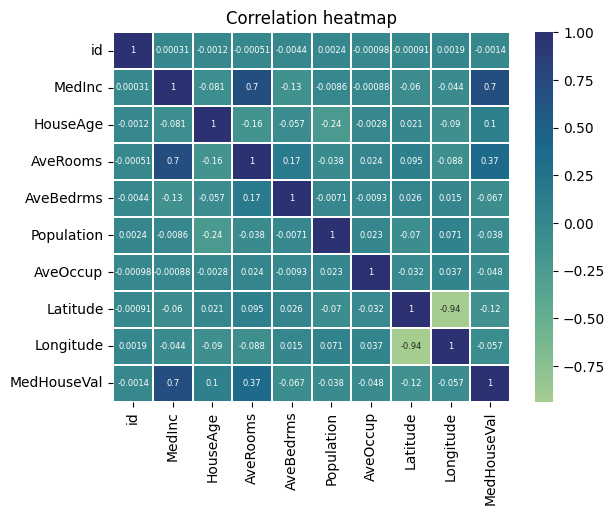

In [58]:
ax = sns.heatmap(correlation_train, annot=True, cmap='crest', linewidths=0.2, annot_kws={"fontsize":6})

ax.set_title('Correlation heatmap')

plt.show()

### Checking for outliers

In [52]:
# checking at the skewness of data
california_housing_train.skew()

id               0.000000
MedInc           1.567604
HouseAge         0.413457
AveRooms         1.301106
AveBedrms       12.965449
Population       5.796582
AveOccup       170.890130
Latitude         0.439251
Longitude       -0.313242
MedHouseVal      0.970856
dtype: float64

In [60]:
california_housing_train['MedHouseVal'].value_counts().sort_index()

0.14999       9
0.17500       1
0.22500       6
0.25000       1
0.26600       2
           ... 
4.98800       1
4.99000       1
4.99100       2
5.00000      46
5.00001    1827
Name: MedHouseVal, Length: 3723, dtype: int64

In [61]:
california_housing_train['MedHouseVal'].describe()

count    37137.000000
mean         2.079751
std          1.158571
min          0.149990
25%          1.208000
50%          1.808000
75%          2.660000
max          5.000010
Name: MedHouseVal, dtype: float64